In [1]:
import mikeio
from watobs import DHIAltimetryRepository
import numpy as np
import matplotlib.pyplot as plt
import os
api_key = os.getenv('DHI_ALTIMETRY_API_KEY')

In [2]:
df = mikeio.open("../output/Area.dfsu")
area_box = [df.geometry.element_coordinates[:,0].min(),df.geometry.element_coordinates[:,1].min(),
            df.geometry.element_coordinates[:,0].max(),df.geometry.element_coordinates[:,1].max()]
area_str = f"bbox={area_box[0]},{area_box[1]},{area_box[2]},{area_box[3]}"


start = "2014-01-01"
end = "2024-01-01"

In [4]:
# Set up altimetry repository
repo = DHIAltimetryRepository(api_key=api_key)
repo.get_satellites()

,long_name
short_name,
gs,Geosat
e1,ERS-1
tx,TOPEX
pn,Poseidon
e2,ERS-2
g1,GFO
j1,Jason-1
n1,Envisat
j2,Jason-2


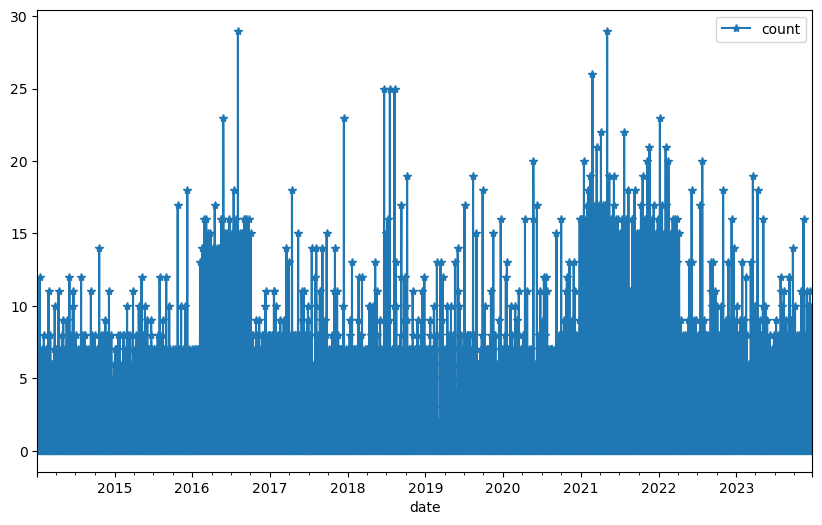

In [ ]:
# Look at availability in the area and time period of interest
df = repo.get_daily_count(area=area_str, start_time=start,end_time=end)
df.plot(marker="*", figsize=(10,6));